In [32]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import ast

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

Text(0.5, 1.0, 'Work From Home Status')

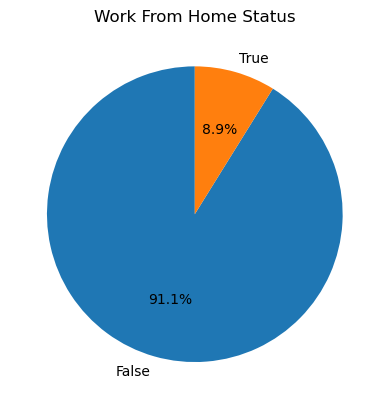

In [33]:
df['job_work_from_home'].value_counts().plot(kind = 'pie' , startangle = 90, autopct = ('%0.1F%%'))
plt.ylabel("")
plt.title("Work From Home Status")

Text(0.5, 1.0, 'Job Titles')

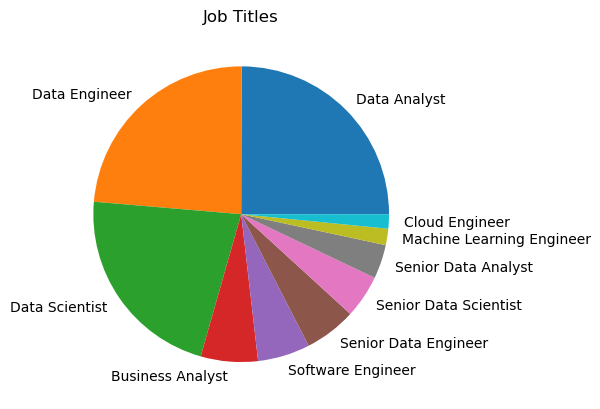

In [34]:
df['job_title_short'].value_counts().plot(kind = 'pie')
plt.ylabel("")
plt.title("Job Titles")

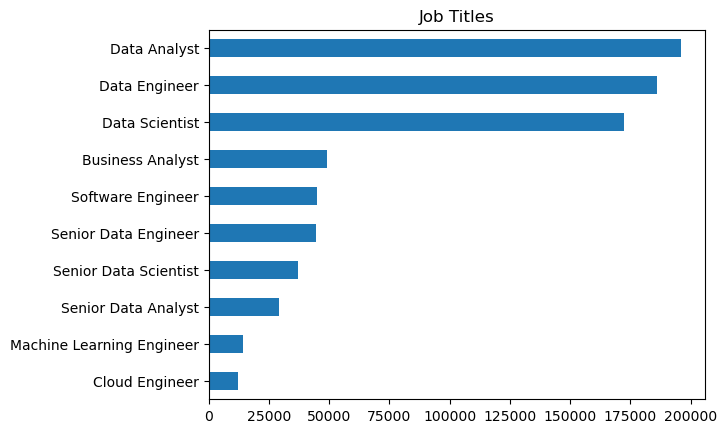

In [35]:
df['job_title_short'].value_counts().plot(kind = 'barh')
plt.ylabel("")
plt.title("Job Titles")
plt.gca().invert_yaxis()

In [36]:
df[['job_work_from_home', 'job_no_degree_mention' , 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


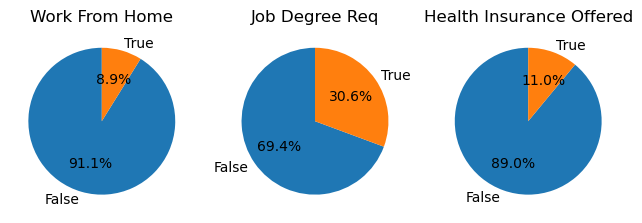

In [42]:
fig , ax = plt.subplots(1,3)

dict_columns = {
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention' : 'Job Degree Req',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i , (column , title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts() , startangle = 90 , autopct = '%1.1f%%' , labels = ['False' , 'True'])
    ax[i].set_title(title)

fig.tight_layout()

#**SCATTER PLOT**


In [44]:
df = df[df['job_title_short'] == 'Data Analyst']

In [51]:
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ( 'job_skills', "count"),
    median_salary = ( 'salary_year_avg' , 'median')
)
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)

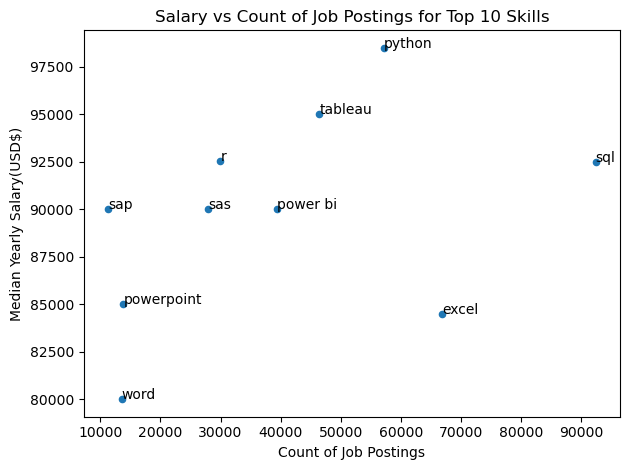

In [57]:
skill_stats.plot(kind = 'scatter' , x= 'skill_count' , y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary(USD$)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i] , txt)


plt.show()